# Caso de Uso #1. Analisis de acciones de la bolsa de Chile

Se utiliza el package de yfinance para analizar el comportamiento de 5 activos de la bolsa chilena. Se utiliza una simulación de montecarlo en base a los rendimientos de los últimos 5 años para proyectar la rentabilidad del próxima año. 
Se obtienen los intervalos de confianza, y la probabilidad obtener rentabilidades minimas esperadas de acuerdo a las distribuciones pasadas. 

In [1]:
!pip install yfinance
!pip install pyfolio

     |████████████████████████████████| 6.4 MB 9.6 MB/s 
     |████████████████████████████████| 63 kB 938 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 91 kB 5.8 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=70e11bfb30ebf1f3

In [12]:
# Librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta
import yfinance as yf
import pyfolio as pf
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)

In [45]:
# Obtención de los datos de acciones de las acciones chilenas analizadas de la biblioteca yfinance de los últimos 5 años

time_span = 5
start = dt.datetime.today().date() - relativedelta(years=time_span)
end = dt.datetime.today().date()

# stock_list = ['COPEC.SN','CHILE.SN','FALABELLA.SN','CENCOSUD.SN', 'LTM.SN']

COPEC = yf.download('COPEC.SN',start, end)[['Adj Close']]
# Cálculo de retornos diarios
daily_data = COPEC.copy().round(4)
daily_data['daily_return']= np.log(daily_data['Adj Close']/daily_data['Adj Close'].shift())
daily_data.dropna(inplace=True)
COPEC = daily_data

CHILE = yf.download('CHILE.SN',start, end)[['Adj Close']]
# Cálculo de retornos diarios
daily_data = CHILE.copy().round(4)
daily_data['daily_return']= np.log(daily_data['Adj Close']/daily_data['Adj Close'].shift())
daily_data.dropna(inplace=True)
CHILE = daily_data

FALABELLA = yf.download('FALABELLA.SN',start, end)[['Adj Close']]
# Cálculo de retornos diarios
daily_data = FALABELLA.copy().round(4)
daily_data['daily_return']= np.log(daily_data['Adj Close']/daily_data['Adj Close'].shift())
daily_data.dropna(inplace=True)
FALABELLA = daily_data

CENCOSUD = yf.download('CENCOSUD.SN',start, end)[['Adj Close']]
# Cálculo de retornos diarios
daily_data = CENCOSUD.copy().round(4)
daily_data['daily_return']= np.log(daily_data['Adj Close']/daily_data['Adj Close'].shift())
daily_data.dropna(inplace=True)
CENCOSUD = daily_data

LTM = yf.download('LTM.SN',start, end)[['Adj Close']]
# Cálculo de retornos diarios
daily_data = LTM.copy().round(4)
daily_data['daily_return']= np.log(daily_data['Adj Close']/daily_data['Adj Close'].shift())
daily_data.dropna(inplace=True)
LTM = daily_data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [49]:
#testing dataframe with data 
CENCOSUD.sample(5)

,Adj Close,daily_return
Date,,
2021-10-05,1264.5095,-0.023937
2021-01-15,1211.4368,-0.018576
2020-10-21,945.5937,0.008039
2022-01-12,1400.0000,0.021661
2017-10-04,1578.0262,0.000510


### Se plotea los rendimientos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


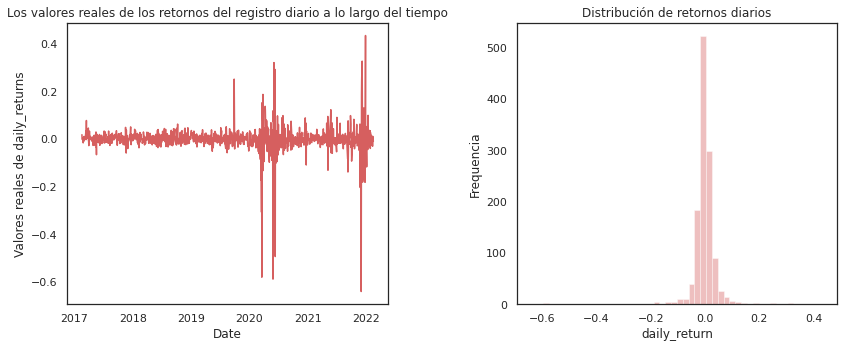

In [60]:
import matplotlib.pyplot as plt

# stock_list = ['COPEC','CHILE','FALABELLA','CENCOSUD', 'LTM']
stocks = LTM

# Visualización de los retornos del registro diario
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
# Trace un histograma simple con el tamaño del bins determinado automáticamente
sns.lineplot(stocks.index,daily_data['daily_return'], color="r")
plt.ylabel('Valores reales de daily_returns')
plt.title('Los valores reales de los retornos del registro diario a lo largo del tiempo')

plt.subplot(1,2,2)

sns.distplot(stocks['daily_return'], kde=False, color="r")
plt.ylabel('Frequencia')

plt.tight_layout()
plt.title('Distribución de retornos diarios')

plt.show();

In [64]:
# stock_list = ['COPEC','CHILE','FALABELLA','CENCOSUD', 'LTM']

# Remuestreo para obtener datos de cierre-cierre semanal y retorno semanal
monthly_data_COPEC = COPEC.resample('M').last()
monthly_data_COPEC['monthly_data'] = np.log(monthly_data_COPEC['Adj Close'] / monthly_data_COPEC['Adj Close'].shift())
monthly_data_COPEC.dropna(inplace=True)
monthly_data_COPEC.head()

#CHILE
monthly_data_CHILE = CHILE.resample('M').last()
monthly_data_CHILE['monthly_data'] = np.log(monthly_data_CHILE['Adj Close'] / monthly_data_CHILE['Adj Close'].shift())
monthly_data_CHILE.dropna(inplace=True)
#FALABELLA
monthly_data_FALABELLA = FALABELLA.resample('M').last()
monthly_data_FALABELLA['monthly_data'] = np.log(monthly_data_FALABELLA['Adj Close'] / monthly_data_FALABELLA['Adj Close'].shift())
monthly_data_FALABELLA.dropna(inplace=True)
#CENCOSUD
monthly_data_CENCOSUD = CENCOSUD.resample('M').last()
monthly_data_CENCOSUD['monthly_data'] = np.log(monthly_data_CENCOSUD['Adj Close'] / monthly_data_CENCOSUD['Adj Close'].shift())
monthly_data_CENCOSUD.dropna(inplace=True)
#LTM
monthly_data_LTM = LTM.resample('M').last()
monthly_data_LTM['monthly_data'] = np.log(monthly_data_LTM['Adj Close'] / monthly_data_LTM['Adj Close'].shift())
monthly_data_LTM.dropna(inplace=True)

,Adj Close,daily_return,monthly_data
Date,,,
2017-03-31,7036.7764,0.010540,0.051086
2017-04-30,7324.1455,0.012889,0.040026
2017-05-31,7603.6797,-0.019022,0.037456
2017-06-30,7181.2642,0.001380,-0.057157
2017-07-31,7841.8335,0.000265,0.087997


In [66]:
from scipy import stats 

#comprobar normalidad de los datos con Anderson-Darling

print(10*'----')
tsad = stats.anderson(monthly_data_COPEC['monthly_data'], dist='norm')
print(f'Para la acción COPEC.SN se tienen los siguientes datos:')
print(f'Test estadístico de Anderson-Darling: {tsad[0]:6.4f}')
print(f'Valores críticos: {tsad[1]}')
print(f'Niveles de significancia: {tsad[2]}')
print(10*'----')
tsad = stats.anderson(monthly_data_CHILE['monthly_data'], dist='norm')
print(f'Para la acción CHILE.SN se tienen los siguientes datos:')
print(f'Test estadístico de Anderson-Darling: {tsad[0]:6.4f}')
print(f'Valores críticos: {tsad[1]}')
print(f'Niveles de significancia: {tsad[2]}')
print(10*'----')
tsad = stats.anderson(monthly_data_FALABELLA['monthly_data'], dist='norm')
print(f'Para la acción FALABELLA.SN se tienen los siguientes datos:')
print(f'Test estadístico de Anderson-Darling: {tsad[0]:6.4f}')
print(f'Valores críticos: {tsad[1]}')
print(f'Niveles de significancia: {tsad[2]}')
print(10*'----')
tsad = stats.anderson(monthly_data_CENCOSUD['monthly_data'], dist='norm')
print(f'Para la acción CENCOSUD.SN se tienen los siguientes datos:')
print(f'Test estadístico de Anderson-Darling: {tsad[0]:6.4f}')
print(f'Valores críticos: {tsad[1]}')
print(f'Niveles de significancia: {tsad[2]}')
print(10*'----')
tsad = stats.anderson(monthly_data_LTM['monthly_data'], dist='norm')
print(f'Para la acción LTM.SN se tienen los siguientes datos:')
print(f'Test estadístico de Anderson-Darling: {tsad[0]:6.4f}')
print(f'Valores críticos: {tsad[1]}')
print(f'Niveles de significancia: {tsad[2]}')


----------------------------------------
Para la acción COPEC.SN se tienen los siguientes datos:
Test estadístico de Anderson-Darling: 0.3144
Valores críticos: [0.544 0.619 0.743 0.866 1.03 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
----------------------------------------
Para la acción CHILE.SN se tienen los siguientes datos:
Test estadístico de Anderson-Darling: 0.4968
Valores críticos: [0.544 0.619 0.743 0.866 1.03 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
----------------------------------------
Para la acción FALABELLA.SN se tienen los siguientes datos:
Test estadístico de Anderson-Darling: 1.1600
Valores críticos: [0.544 0.619 0.743 0.866 1.03 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
----------------------------------------
Para la acción CENCOSUD.SN se tienen los siguientes datos:
Test estadístico de Anderson-Darling: 0.3125
Valores críticos: [0.544 0.619 0.743 0.866 1.03 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
-------------

In [76]:
from scipy.stats import shapiro
stat2, p2 = shapiro(monthly_data_COPEC['monthly_data'])

if p2 < 0.01:
    test_result1 = 'No es Normal'
    print(f' Si el p-value es {p2}, por lo tanto se rechaza que los datos se distribuyen normnalmente con un 99% de confianza.')
else:
    test_result1 = 'NORMAL'
    print(f'El p-value es {p2}, por lo tanto asumimos que los datos estan distribuidos normalmente con un 99% de confianza. ')

El p-value es 0.4304189085960388, por lo tanto asumimos que los datos estan distribuidos normalmente con un 99% de confianza. 


**_Conclusión_:** Solamente la acción de LTM no se distribuye normalmente dentro del set de acciones chilenas.

In [134]:
# Modelaremos las rentabilidades acumuladas de los próximos 12 meses en la acción de CHILE

# stock_list = ['COPEC','CHILE','FALABELLA','CENCOSUD', 'LTM']

import random

monthly_return = monthly_data_CENCOSUD
label_stock = 'CENCOSUD.SN'

m = 10000
s = 12 #12 meses = 1 años
rent = monthly_return['monthly_data']
n = len(rent)

# Crear lista para almacenar sumas de los periodos (s meses)
total=[] #Crearemos una lista para almacenar la suma de las simulaciones de s meses
for k in range(0, m):
    suma=0
    for i in range(0, s):
      # Lanzamos la ruleta
      r = random.randint(0, n - 1)
      suma += rent[r]
    total.append(suma)
    
print(f'La producción para 10000 corrida de simulación es')
print(f'Simulación #1 (12 meses): \t{total[0]}')
print(f'Simulación #2 (12 meses): \t{total[1]}')
print(f'Simulación #3 (12 meses): \t{total[2]}')
print('...')
print(f'Simulación #10000 (12 meses): \t{total[-1]}\n')

print(f'Media de totales: {np.mean(total): 4.2f}')
print(f'Desviación estándar: {np.std(total): 4.2f}')

La producción para 10000 corrida de simulación es
Simulación #1 (12 meses): 	0.21647966268139798
Simulación #2 (12 meses): 	0.4453538056239705
Simulación #3 (12 meses): 	-0.09555524791142544
...
Simulación #10000 (12 meses): 	0.26568525061309545

Media de totales: -0.01
Desviación estándar:  0.30


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Simulación Montecarlo para rentabilidades de CENCOSUD.SN en 12 meses')

No handles with labels found to put in legend.


(-1.0, 1.0)

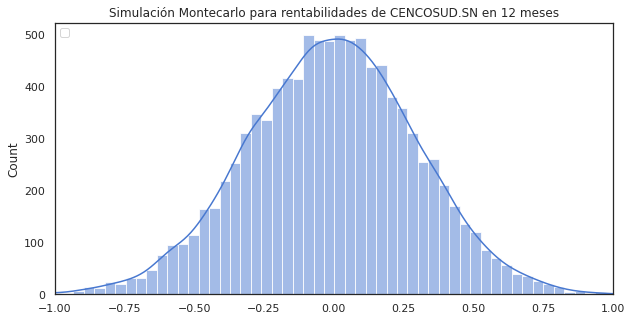

In [135]:
#crear grafico, con las sumas de las 10.000 simulaciones
plt.figure(figsize=(10, 5))
plt.title('Simulación Montecarlo para rentabilidades de '+label_stock+' en 12 meses')
# plt.hist(total,20,color='b',label='Total',density=True) #con 20  clases fijas
sns.histplot(data=total, kde=True)
plt.legend(loc='upper left')
# plt.xticks(range(-1, 1, 0.5))
plt.xlim([-1,1])
plt.show()

In [136]:
# i. ¿Cuál es la rentabilidad real acumulada más probable en los próximos 12 meses?
# El valor más probable corresponde al percentil-50 (o mediana) de la distribución

p50 = np.percentile(total, 50)
print(f'La rentabilidad de {label_stock} acumulada más probable en los próximos 12 meses es de {p50: 2.4f}')

La rentabilidad de CENCOSUD.SN acumulada más probable en los próximos 12 meses es de -0.0027


In [137]:
# ii. ¿Cuál es la rentabilidad real acumulada que tendrá al menos un 85% de probabilidad de éxito?
# La rentabilidad de al menos un 85% de éxito corresponde al percentil-15

p15 = np.percentile(total, 15)
print(f'La rentabilidad {label_stock} acumulada con 85% de éxito en los próximos 12 meses es de {p15: 2.4f} ')

La rentabilidad CENCOSUD.SN acumulada con 85% de éxito en los próximos 12 meses es de -0.3209 


In [138]:
# iii. intervalo de confianza

z = 1.96

mean = np.mean(monthly_return['monthly_data'])
std = np.std(monthly_return['monthly_data'],ddof=1)/ np.sqrt(len(monthly_return))

#95% Intervalo de confianza.
upper = mean + z * std
lower = mean - z * std

CI_95 = (100*np.round(lower,3),100*np.round(upper,3))
print(f'Estimación del rendimiento mensual medio para la acción {label_stock} es de : {100 * mean:4.3f}%') # Lo expresamos como por ciento
print(f'Intervalo de confianza del 95% para el rendimiento mensual medio para la acción {label_stock} es de (en %): {CI_95}')


Estimación del rendimiento mensual medio para la acción CENCOSUD.SN es de : -0.072%
Intervalo de confianza del 95% para el rendimiento mensual medio para la acción CENCOSUD.SN es de (en %): (-2.3, 2.1999999999999997)




---



#### Resumen de resultados (para acciones que distriuyen normalmente):

COPEC
* La rentabilidad de COPEC.SN acumulada más probable en los próximos 12 meses es de  0.0037
* La rentabilidad COPEC.SN acumulada con 85% de éxito en los próximos 12 meses es de -0.2932 
* Estimación del rendimiento mensual medio para la acción COPEC.SN es de : -0.022%
* Intervalo de confianza del 95% para el rendimiento mensual medio para la acción COPEC.SN es de (en %): (-2.1, 2.0)

CHILE
* La rentabilidad de CHILE.SN acumulada más probable en los próximos 12 meses es de  0.0692
* La rentabilidad CHILE.SN acumulada con 85% de éxito en los próximos 12 meses es de -0.1789 
* Estimación del rendimiento mensual medio para la acción CHILE.SN es de : 0.551%
* Intervalo de confianza del 95% para el rendimiento mensual medio para la acción CHILE.SN es de (en %): (-1.2, 2.3)

FALABELLA
* La rentabilidad de FALABELLA.SN acumulada más probable en los próximos 12 meses es de -0.1401
* La rentabilidad FALABELLA.SN acumulada con 85% de éxito en los próximos 12 meses es de -0.5139 
* Estimación del rendimiento mensual medio para la acción FALABELLA.SN es de : -1.156%
* Intervalo de confianza del 95% para el rendimiento mensual medio para la acción FALABELLA.SN es de (en %): (-3.9, 1.5)

CENCOSUD
* La rentabilidad de CENCOSUD.SN acumulada más probable en los próximos 12 meses es de -0.0027
* La rentabilidad CENCOSUD.SN acumulada con 85% de éxito en los próximos 12 meses es de -0.3209 
* Estimación del rendimiento mensual medio para la acción CENCOSUD.SN es de : -0.072%
* Intervalo de confianza del 95% para el rendimiento mensual medio para la acción CENCOSUD.SN es de (en %): (-2.3, 2.1999999999999997)

**_Conclusión:_** Basado en las rentabilidades pasadas, la mejor acción para inverir de las analizadas es la del Banco de Chile.

# Caso de Uso #2. Servicio de alimentación

El servicio de alimentación requiere estimar los servicios que prestara las siguientes semanas, para ello cuenta con el registro de los servicios de almuerzo y cena semanal del año 2020

In [ ]:
# Importamos librerias para anlisis de los datos ...
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from math import ceil
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
servicios_path = '/content/drive/MyDrive/Inferencia Estadística/Caso de Uso/'
servicios_df = pd.read_csv(servicios_path + 'ServicioAlimentación.csv', sep=';', encoding='latin-1')

servicios_df.head(5)


,Semana,Almuerzo,Cena
0,1,88,90
1,2,245,167
2,3,206,181
3,4,247,172
4,5,233,205


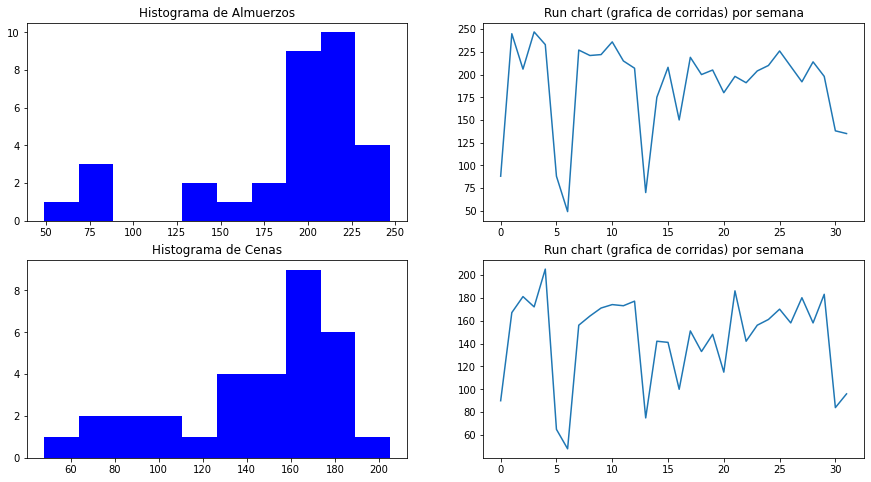

In [ ]:
n = len(servicios_df)

# Graficamos histograma de los servicios de limentación semanales
fig, ax = plt.subplots(2,2, figsize=(15,8))
ax[0,0].hist(servicios_df['Almuerzo'], bins=10, density=False, cumulative=False, color='b')
ax[0,0].set_title('Histograma de Almuerzos')
ax[0,1].plot(servicios_df['Almuerzo'])
ax[0,1].set_title('Run chart (grafica de corridas) por semana')

ax[1,0].hist(servicios_df['Cena'], bins=10, density=False, cumulative=False, color='b')
ax[1,0].set_title('Histograma de Cenas')
ax[1,1].plot(servicios_df['Cena'])
ax[1,1].set_title('Run chart (grafica de corridas) por semana')
plt.show()


In [ ]:
# calcular estadísticos
Almuerzo_n = np.size(servicios_df['Almuerzo'])
Almuerzo_media = np.mean(servicios_df['Almuerzo'])
Almuerzo_sigma = np.std(servicios_df['Almuerzo'], ddof=Almuerzo_n-1)

Cena_n = np.size(servicios_df['Cena'])
Cena_media = np.mean(servicios_df['Cena'])
Cena_sigma = np.std(servicios_df['Cena'], ddof=Cena_n-1)

print(f'Servicio   Tamaño muestra      Media   Desviación estándar')
print(f'**********************************************************')
print(f'Almuerzo : {Almuerzo_n:14.0f}  {Almuerzo_media:9.4f}  {Almuerzo_sigma:20.4f}  ')
print(f'Cena     : {Cena_n:14.0f}  {Cena_media:9.4f}  {Cena_sigma:20.4f}  ')
print(f'**********************************************************')
print(f'\n')

Servicio   Tamaño muestra      Media   Desviación estándar
**********************************************************
Almuerzo :             32   187.6875              285.9840  
Cena     :             32   144.4375              220.4538  
**********************************************************




In [ ]:
# Aplicando la simulación de montecarlo 

# Simulación Almuerzos
s = 4 
m = 10000
almuelzo_sim = [] 

for k in range(0, m):
    almuelzo_suma=0
    for i in range(0, s):
      # Lanzamos la ruleta
      r = random.randint(0, Almuerzo_n - 1)
      almuelzo_suma += servicios_df['Almuerzo'][r]
    almuelzo_sim.append(almuelzo_suma)
    
# Simulación Cenas
s = 4 
m = 10000
cena_sim = [] 

for k in range(0, m):
    cena_suma=0
    for i in range(0, s):
      # Lanzamos la ruleta
      r = random.randint(0, Cena_n - 1)
      cena_suma += servicios_df['Cena'][r]
    cena_sim.append(cena_suma)
    


In [ ]:
    
print(f'Servicio de Almuerzo para {m} corrida de simulación es')
print(f'Semana 1: \t{almuelzo_sim[0]}')
print(f'Semana 2: \t{almuelzo_sim[1]}')
print(f'Semana 3: \t{almuelzo_sim[2]}')
print('...')
print(f'Semana 10000: \t{almuelzo_sim[-1]}\n')

print(f'Media de totales: {np.mean(almuelzo_sim): 4.2f}')
print(f'Desviación estándar: {np.std(almuelzo_sim): 4.2f}')

Servicio de Almuerzo para 10000 corrida de simulación es
Semana 1: 	295
Semana 2: 	342
Semana 3: 	345
...
Semana 10000: 	963

Media de totales:  751.97
Desviación estándar:  101.02


In [ ]:

print(f'Servicio de Cena para {m} corrida de simulación es')
print(f'Semana 1: \t{cena_sim[0]}')
print(f'Semana 2: \t{cena_sim[1]}')
print(f'Semana 3: \t{cena_sim[2]}')
print('...')
print(f'Semana 10000: \t{cena_sim[-1]}\n')

print(f'Media de totales: {np.mean(cena_sim): 4.2f}')
print(f'Desviación estándar: {np.std(cena_sim): 4.2f}')

Servicio de Cena para 10000 corrida de simulación es
Semana 1: 	655
Semana 2: 	613
Semana 3: 	552
...
Semana 10000: 	564

Media de totales:  577.97
Desviación estándar:  78.03


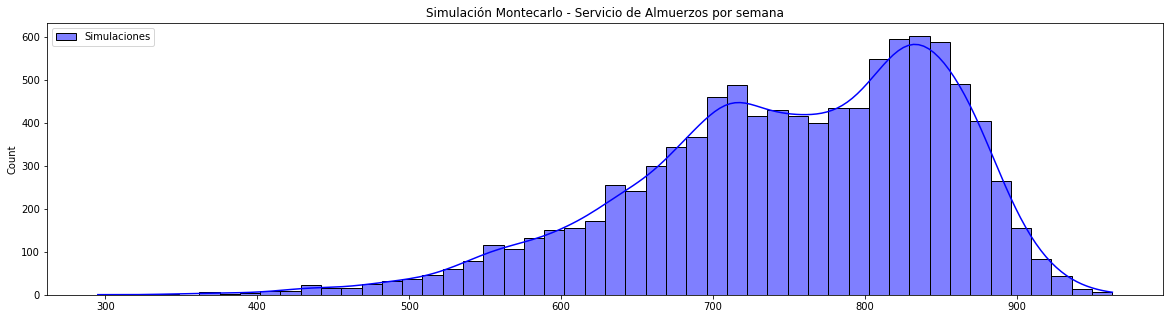

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Simulación Montecarlo - Servicio de Almuerzos por semana')
sns.histplot(data=almuelzo_sim, color='b', label='Simulaciones', kde=True)
plt.legend(loc='upper left')
#plt.xticks(range(300,1000))
plt.show()



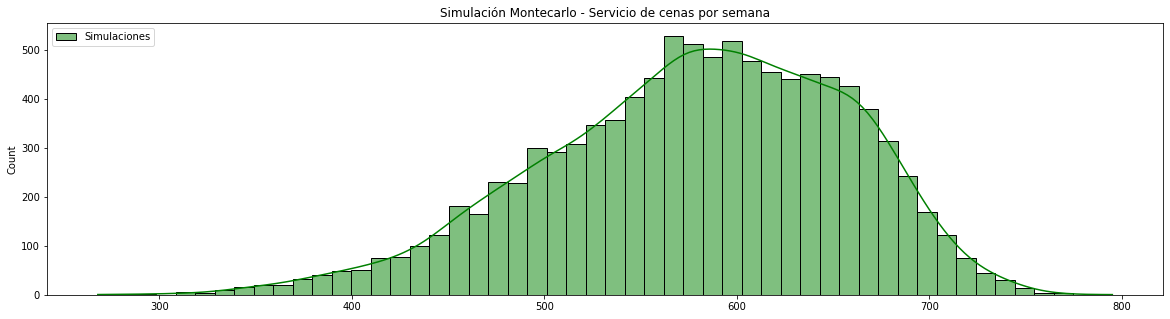

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Simulación Montecarlo - Servicio de cenas por semana')
sns.histplot(data=cena_sim, color='g', label='Simulaciones', kde=True)
plt.legend(loc='upper left')
#plt.xticks(range(300,1000))
plt.show()


In [ ]:

# Calcular la prob de vender 751 almuerzos en 4 semanas (187.6875*4)
almuerzo_venta = round(Almuerzo_media*4)
almuerzo_prob_venta = almuelzo_sim.count(almuerzo_venta) / m
print(f'Probabilidad de vender {almuerzo_venta} almuerzos = {almuerzo_prob_venta:9.4f}')

# Calcular la prob de vender 578 cenas en 4 semanas (144.4375*4)
cena_venta = round(Cena_media*4)
cena_prob_venta = cena_sim.count(cena_venta) / m
print(f'Probabilidad de vender {cena_venta} cenas     = {cena_prob_venta:9.4f}')



Probabilidad de vender 751 almuerzos =    0.0030
Probabilidad de vender 578 cenas     =    0.0044


Hay una probalidad del 0.3% de vender 751 almuerzos y de 0.44% de vender 578 cenas en 4 semanas; con un riesgo superior al 99.7% y 99.66% respectivamente. 


In [ ]:
almuelzo_p15 = np.percentile(almuelzo_sim, 15)
cena_p15 = np.percentile(cena_sim, 15)
print(f'Almuerzo Percentil 15: {almuelzo_p15:6.0f}, con 85% de probabilidad de vender los almuerzos en las 4 semanas')
print(f'Cena     Percentil 15: {cena_p15:6.0f}, con 85% de probabilidad de vender los cenas en las 4 semanas')


Almuerzo Percentil 15:    644, con 85% de probabilidad de vender los almuerzos en las 4 semanas
Cena     Percentil 15:    494, con 85% de probabilidad de vender los cenas en las 4 semanas


En cuatro semanas se podrias vender con un 85% de certeza 644 almuerzos y 494 cenas o mas.

In [ ]:
almuelzo_sim.count(751)/m

0.003

In [ ]:
for i in almuelzo_sim:
  if i < 800:
    print(i)


Se han truncado las últimas 5000 líneas del flujo de salida.
619
619
619
619
619
619
619
619
619
619
619
619
619
619
620
620
620
620
620
620
620
620
620
620
620
621
621
621
621
621
621
621
621
621
621
621
621
621
621
621
621
621
621
622
622
622
623
623
623
623
623
623
623
623
623
623
623
624
624
624
624
624
624
624
624
624
624
624
624
624
624
624
624
625
625
625
625
625
625
625
625
625
625
625
625
625
625
625
626
626
626
626
626
626
626
626
626
626
626
626
626
626
627
627
627
627
627
627
627
627
627
627
627
627
627
627
627
627
627
627
627
628
628
628
628
629
629
629
629
629
629
629
629
629
629
629
629
629
629
629
629
629
629
629
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
631
631
631
631
631
631
631
631
631
631
631
631
631
631
631
632
632
632
632
632
632
632
632
632
632
632
632
632
632
632
632
632
632
632
633
633
633
633
633
633
633
633
633
633
633
633
633
633
633
633
633
633
633
634
634
634
634
634
634
634
634
634
634
634
634
634
634
634
635
635
635
635
635

# Caso de Uso #3. Reporte



Utilizando como ejemplo el dataset Wine Quality de Kaggle, planeo crear un codigo que siga los pasos necesarios para identificar cual es la mejor variable unica que pueda segmentarse en 2 partes para identificar la variable objetivo.

* Variable Objetivo: Quality


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat

In [ ]:
dataset = pd.read_csv('WineQT.csv')
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Index(['volatile_acidity', 'citric_acid', 'sulphates', 'alcohol', 'quality'], dtype='object')


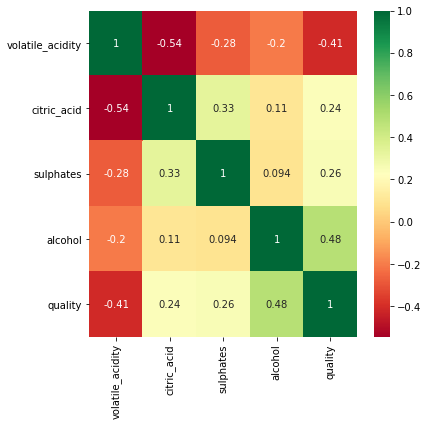

In [ ]:
# Se eliminan todos los que tengan una correlacion cercana a 0 (+- 0,2)
corrValues = dataset.corr(method='pearson')
topCorrFeaturesForEarnig = corrValues.index[abs(corrValues['quality']) >= 0.2]
print(topCorrFeaturesForEarnig)

plt.figure(figsize=(6,6))
ax = sns.heatmap(dataset[topCorrFeaturesForEarnig].corr(), annot=True, cmap="RdYlGn")

In [ ]:
# Este step se debe automatizar en base a los index que se obtienen del paso anterior.
dataset = dataset.drop(["Id", "pH", "density","total_sulfur_dioxide","free_sulfur_dioxide","chlorides","fixed_acidity","residual_sugar"], axis=1)
dataset.head()

,volatile_acidity,citric_acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,5
1,0.88,0.00,0.68,9.8,5
2,0.76,0.04,0.65,9.8,5
3,0.28,0.56,0.58,9.8,6
4,0.70,0.00,0.56,9.4,5


In [ ]:
print('Data set size = ', dataset.shape)
print('Dimension = ', dataset.ndim)
dataset.dtypes

Data set size =  (1143, 5)
Dimension =  2


volatile_acidity    float64
citric_acid         float64
sulphates           float64
alcohol             float64
quality               int64
dtype: object

In [ ]:
dataset.describe()

,volatile_acidity,citric_acid,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.531339,0.268364,0.657708,10.442111,5.657043
std,0.179633,0.196686,0.170399,1.082196,0.805824
min,0.120000,0.000000,0.330000,8.400000,3.000000
25%,0.392500,0.090000,0.550000,9.500000,5.000000
50%,0.520000,0.250000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,0.730000,11.100000,6.000000
max,1.580000,1.000000,2.000000,14.900000,8.000000


In [ ]:
dataset.isna().any()
# Despues de este step, falta agregar un paso que limpie si uno es True, no fue el caso en este dataset.

volatile_acidity    False
citric_acid         False
sulphates           False
alcohol             False
quality             False
dtype: bool

array([[<AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>]],
      dtype=object)

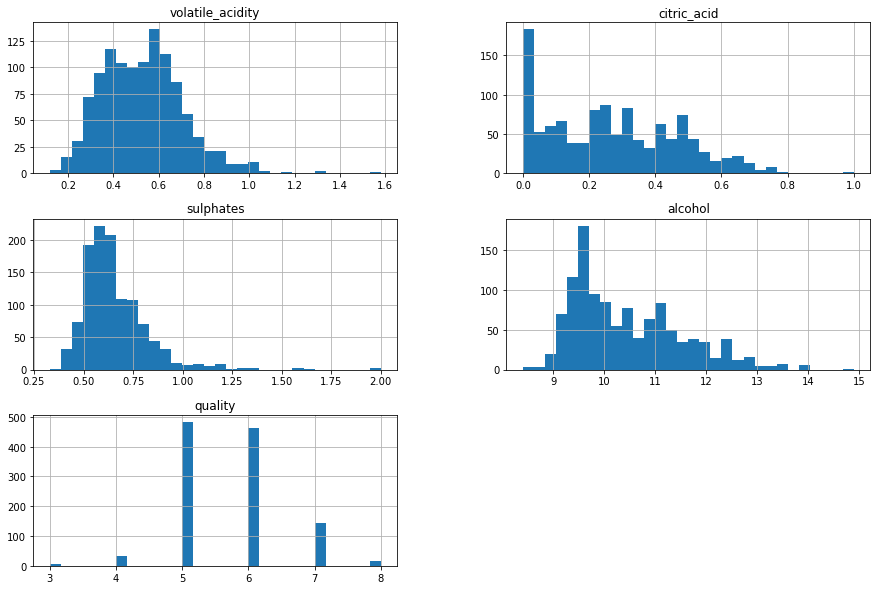

In [ ]:
dataset.hist(bins=30, figsize=(15, 10))

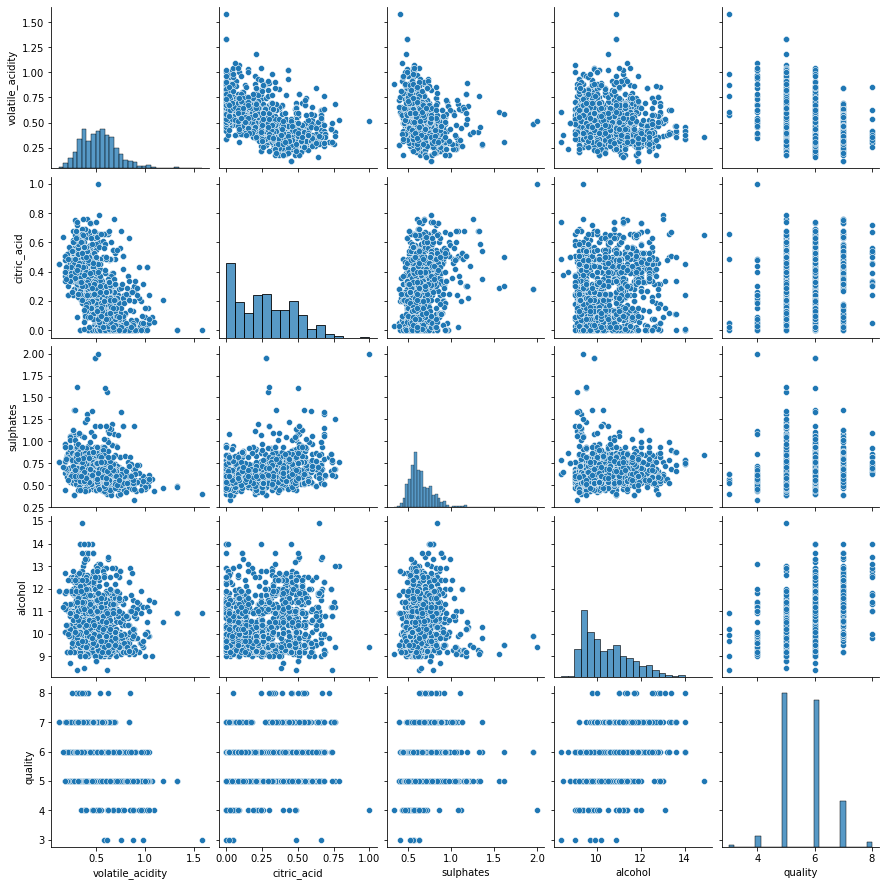

In [ ]:
sns.pairplot(dataset, vars=dataset.columns, diag_kind="hist")

### En teoria, los siguientes pasos deberian estar en un for-loop, pero esta en WIP (Fallo el intento)

Test de Hipotesis con alfa 0.05: 

   **Ha** = Los valores altos son los unicos que influyen en la correlacion de "Calidad"
    
   **H0** = Ambas secciones influyen de la misma manera
    

Average value: 6.0
Cantidad de valores altos: 159
Cantidad de valores bajos: 984
Estadistica : -6.750142948193117, p : 0.0 

H0 Rechazado


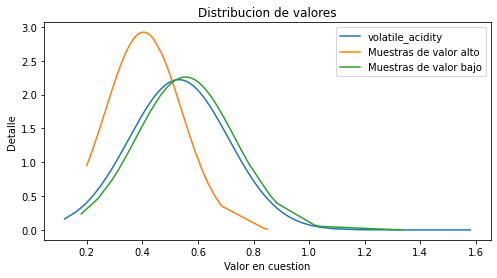

In [ ]:
sampleSize = 100
medianValue = dataset.quality.median()
print(f'Average value: {medianValue}')

highValues = dataset[dataset.quality > medianValue].volatile_acidity
print("Cantidad de valores altos:", highValues.count())

lowValues = dataset[dataset.quality <= medianValue].volatile_acidity
print("Cantidad de valores bajos:", lowValues.count())

highValuesDB = dataset[dataset.quality > medianValue].volatile_acidity.sample(sampleSize).sort_values()
lowValuesDB = dataset[dataset.quality <= medianValue].volatile_acidity.sample(sampleSize).sort_values()

allValues = dataset['volatile_acidity'].sort_values();
allValuesDetail = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(allValues, allValuesDetail, label='volatile_acidity')

fit1 = stat.norm.pdf(highValuesDB, highValuesDB.mean(), highValuesDB.std())
ax.plot(highValuesDB, fit1, label='Muestras de valor alto')

fit2 = stat.norm.pdf(lowValuesDB, lowValuesDB.mean(), lowValuesDB.std())
ax.plot(lowValuesDB, fit2, label='Muestras de valor bajo')

plt.title('Distribucion de valores')
plt.xlabel('Valor en cuestion')
plt.ylabel('Detalle')
plt.legend()

statistics, p = stat.ttest_ind(highValuesDB, lowValuesDB)
print(f'Estadistica : {statistics}, p : {round(p,2)} \n')

alpha = 0.05  # 5% area under the normal graph
if p > alpha:
    print('H0 Aprobado')
else:
    print('H0 Rechazado')

Average value: 6.0
Cantidad de valores altos: 159
Cantidad de valores bajos: 984
Estadistica : 3.673550456879453, p : 0.0 

H0 Rechazado


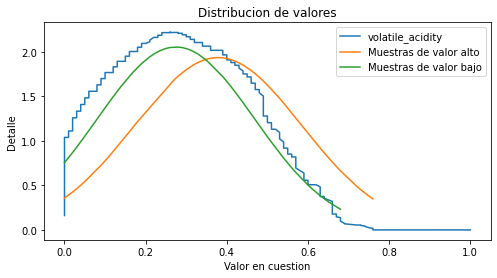

In [ ]:
sampleSize = 100
medianValue = dataset.quality.median()
print(f'Average value: {medianValue}')

highValues = dataset[dataset.quality > medianValue].citric_acid
print("Cantidad de valores altos:", highValues.count())

lowValues = dataset[dataset.quality <= medianValue].citric_acid
print("Cantidad de valores bajos:", lowValues.count())

highValuesDB = dataset[dataset.quality > medianValue].citric_acid.sample(sampleSize).sort_values()
lowValuesDB = dataset[dataset.quality <= medianValue].citric_acid.sample(sampleSize).sort_values()

allValues = dataset['citric_acid'].sort_values();
allValuesDetail = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(allValues, allValuesDetail, label='volatile_acidity')

fit1 = stat.norm.pdf(highValuesDB, highValuesDB.mean(), highValuesDB.std())
ax.plot(highValuesDB, fit1, label='Muestras de valor alto')

fit2 = stat.norm.pdf(lowValuesDB, lowValuesDB.mean(), lowValuesDB.std())
ax.plot(lowValuesDB, fit2, label='Muestras de valor bajo')

plt.title('Distribucion de valores')
plt.xlabel('Valor en cuestion')
plt.ylabel('Detalle')
plt.legend()

statistics, p = stat.ttest_ind(highValuesDB, lowValuesDB)
print(f'Estadistica : {statistics}, p : {round(p,2)} \n')

alpha = 0.05  # 5% area under the normal graph
if p > alpha:
    print('H0 Aprobado')
else:
    print('H0 Rechazado')

Average value: 6.0
Cantidad de valores altos: 159
Cantidad de valores bajos: 984
Estadistica : 5.992391631662194, p : 0.0 

H0 Rechazado


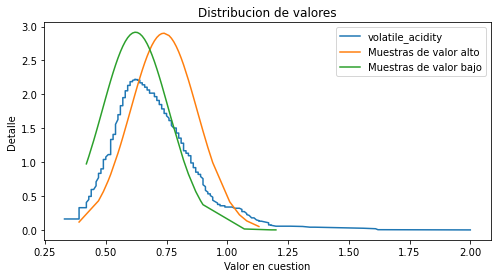

In [ ]:
sampleSize = 100
medianValue = dataset.quality.median()
print(f'Average value: {medianValue}')

highValues = dataset[dataset.quality > medianValue].sulphates
print("Cantidad de valores altos:", highValues.count())

lowValues = dataset[dataset.quality <= medianValue].sulphates
print("Cantidad de valores bajos:", lowValues.count())

highValuesDB = dataset[dataset.quality > medianValue].sulphates.sample(sampleSize).sort_values()
lowValuesDB = dataset[dataset.quality <= medianValue].sulphates.sample(sampleSize).sort_values()

allValues = dataset['sulphates'].sort_values();
allValuesDetail = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(allValues, allValuesDetail, label='volatile_acidity')

fit1 = stat.norm.pdf(highValuesDB, highValuesDB.mean(), highValuesDB.std())
ax.plot(highValuesDB, fit1, label='Muestras de valor alto')

fit2 = stat.norm.pdf(lowValuesDB, lowValuesDB.mean(), lowValuesDB.std())
ax.plot(lowValuesDB, fit2, label='Muestras de valor bajo')

plt.title('Distribucion de valores')
plt.xlabel('Valor en cuestion')
plt.ylabel('Detalle')
plt.legend()

statistics, p = stat.ttest_ind(highValuesDB, lowValuesDB)
print(f'Estadistica : {statistics}, p : {round(p,2)} \n')

alpha = 0.05  # 5% area under the normal graph
if p > alpha:
    print('H0 Aprobado')
else:
    print('H0 Rechazado')

Average value: 6.0
Cantidad de valores altos: 159
Cantidad de valores bajos: 984
Estadistica : 7.139118319964108, p : 0.0 

H0 Rechazado


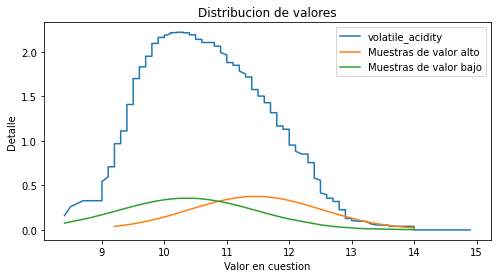

In [ ]:
sampleSize = 100
medianValue = dataset.quality.median()
print(f'Average value: {medianValue}')

highValues = dataset[dataset.quality > medianValue].alcohol
print("Cantidad de valores altos:", highValues.count())

lowValues = dataset[dataset.quality <= medianValue].alcohol
print("Cantidad de valores bajos:", lowValues.count())

highValuesDB = dataset[dataset.quality > medianValue].alcohol.sample(sampleSize).sort_values()
lowValuesDB = dataset[dataset.quality <= medianValue].alcohol.sample(sampleSize).sort_values()

allValues = dataset['alcohol'].sort_values();
allValuesDetail = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(allValues, allValuesDetail, label='volatile_acidity')

fit1 = stat.norm.pdf(highValuesDB, highValuesDB.mean(), highValuesDB.std())
ax.plot(highValuesDB, fit1, label='Muestras de valor alto')

fit2 = stat.norm.pdf(lowValuesDB, lowValuesDB.mean(), lowValuesDB.std())
ax.plot(lowValuesDB, fit2, label='Muestras de valor bajo')

plt.title('Distribucion de valores')
plt.xlabel('Valor en cuestion')
plt.ylabel('Detalle')
plt.legend()

statistics, p = stat.ttest_ind(highValuesDB, lowValuesDB)
print(f'Estadistica : {statistics}, p : {round(p,2)} \n')

alpha = 0.05  # 5% area under the normal graph
if p > alpha:
    print('H0 Aprobado')
else:
    print('H0 Rechazado')

En este caso, la conclusion es que este metodo se ve afectado considerablemente cuando se trabaja con una variable objetivo cualificativa y variables independientes con una distribucion distinta a la normal